In [1]:
# loading libraries and reading the data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style = "white")

# read the data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")

### Boxplots

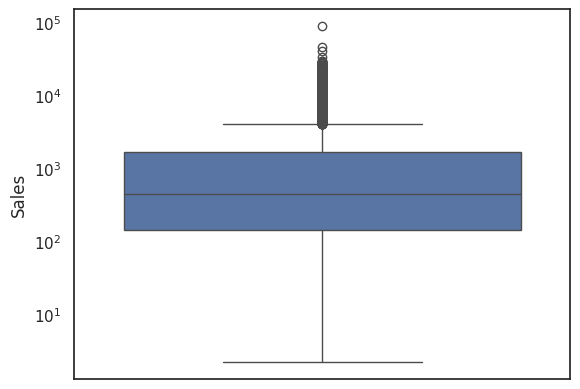

In [2]:
# boxplot of a variable
sns.boxplot(y = market_df['Sales'])
plt.yscale('log')
plt.show()

In [3]:
# merge the dataframe to add a categorical variable
df = pd.merge(market_df, product_df, how = 'inner', on = 'Prod_id') 
df.head(5)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,TECHNOLOGY,OFFICE MACHINES


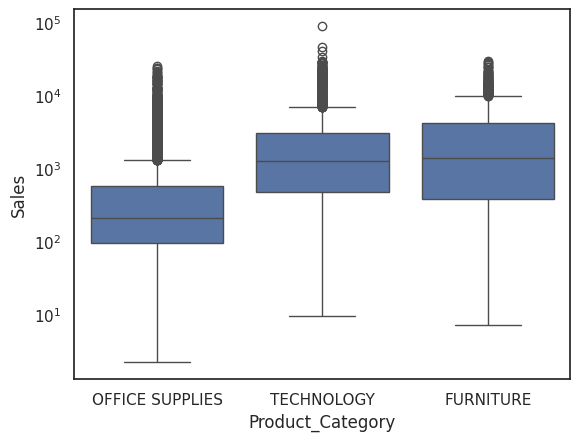

In [4]:
# boxplot of a variable across various product categories
sns.boxplot(x = 'Product_Category', y = 'Sales', data = df)
plt.yscale('log')
plt.show()

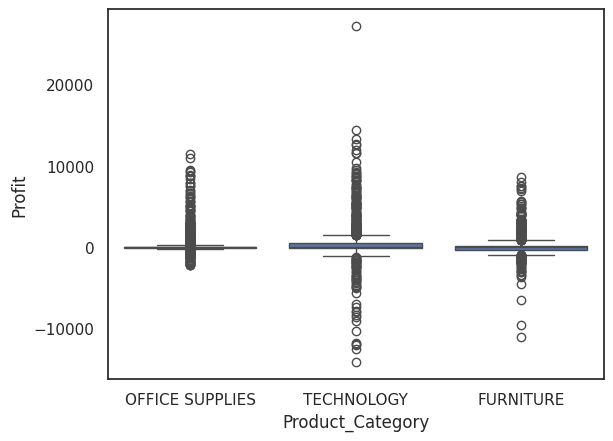

In [5]:
sns.boxplot(x = 'Product_Category', y = 'Profit', data = df)
plt.show()

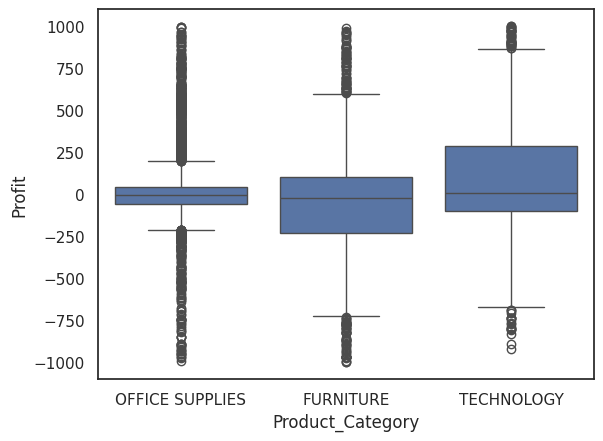

In [6]:
df = df[(df.Profit < 1000) & (df.Profit > -1000)]

# boxplot of a variable across various product categories
sns.boxplot(x = 'Product_Category', y = 'Profit', data = df)
plt.show()

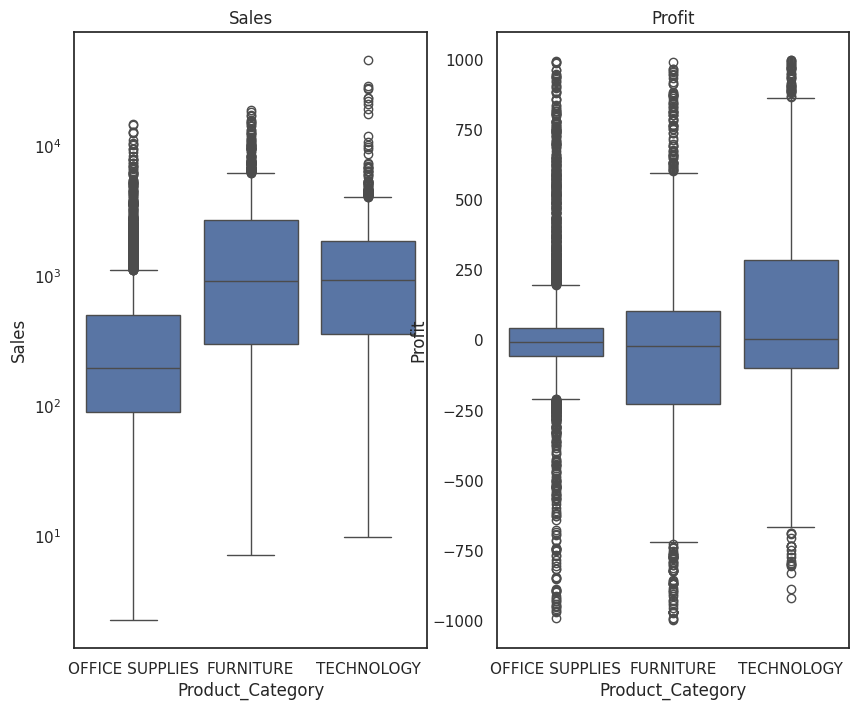

In [7]:
# Adjust the figure size
plt.figure(figsize = (10, 8))

# subplot 1: Sales
plt.subplot(1,2,1)
sns.boxplot(x = 'Product_Category', y = 'Sales', data = df)
plt.title("Sales")
plt.yscale('log')

# subplot 2: Profit
plt.subplot(1,2,2)
sns.boxplot(x = 'Product_Category', y = 'Profit', data = df)
plt.title("Profit")


plt.show()

In [8]:
df = pd.merge(df, customer_df, how='inner', on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_31,Prod_12,SHP_41,Cust_26,14.76,0.01,5,1.32,0.50,0.36,OFFICE SUPPLIES,LABELS,AARON BERGMAN,NUNAVUT,NUNAVUT,CORPORATE


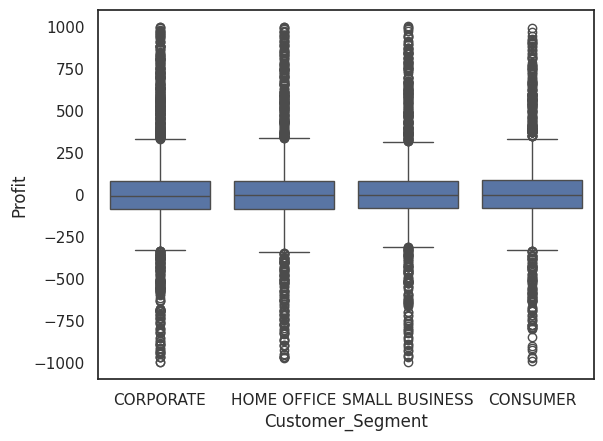

In [9]:
# boxplot of a variable across various product categories
sns.boxplot(x='Customer_Segment', y='Profit', data=df)
plt.show()

### Plotting Aggregated Values across Categories

#### Bar Plots - Mean, Median, and Count Plots

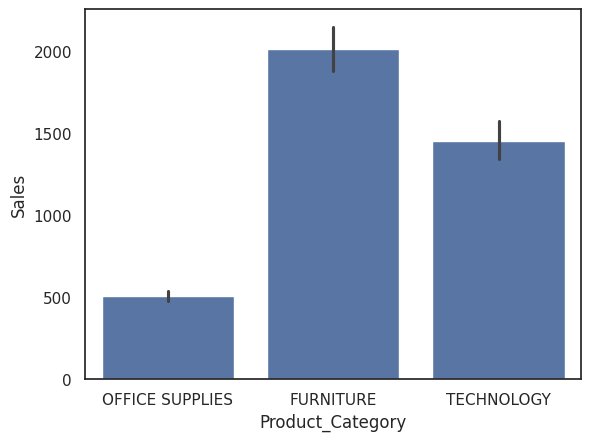

In [10]:
# bar plot with default statistics = mean
sns.barplot(x = 'Product_Category', y = 'Sales', data = df)
plt.show()

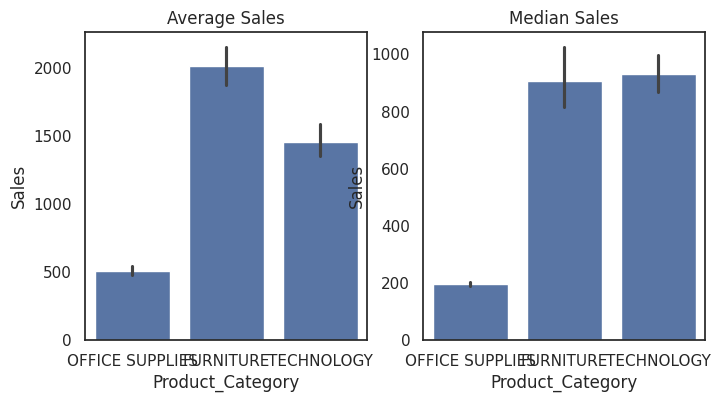

In [11]:
# Create 2 subplots for mean and median respectively

# Increase the figure size
plt.figure(figsize = (8, 4))

# subplot 1 : statistic = mean
plt.subplot(1,2,1)
sns.barplot(x = 'Product_Category', y = 'Sales', data = df)
plt.title("Average Sales")

# subplot 2: statistic = median
plt.subplot(1,2,2)
sns.barplot(x = 'Product_Category', y = 'Sales', data = df, estimator = np.median)
plt.title("Median Sales")

plt.show()

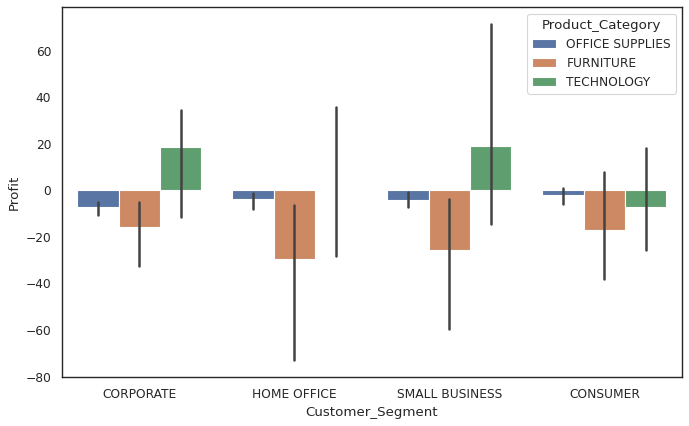

In [12]:
# set figure size for larger figure
plt.figure( num = None, figsize = (10,6), dpi = 80, facecolor = 'w', edgecolor = 'k')

# specify hue = "Categorical_variable"
sns.barplot(x = 'Customer_Segment', y = 'Profit', hue = "Product_Category", data = df, estimator = np.median)

plt.show()

When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis. Let's now *drill down into product sub categories*. 

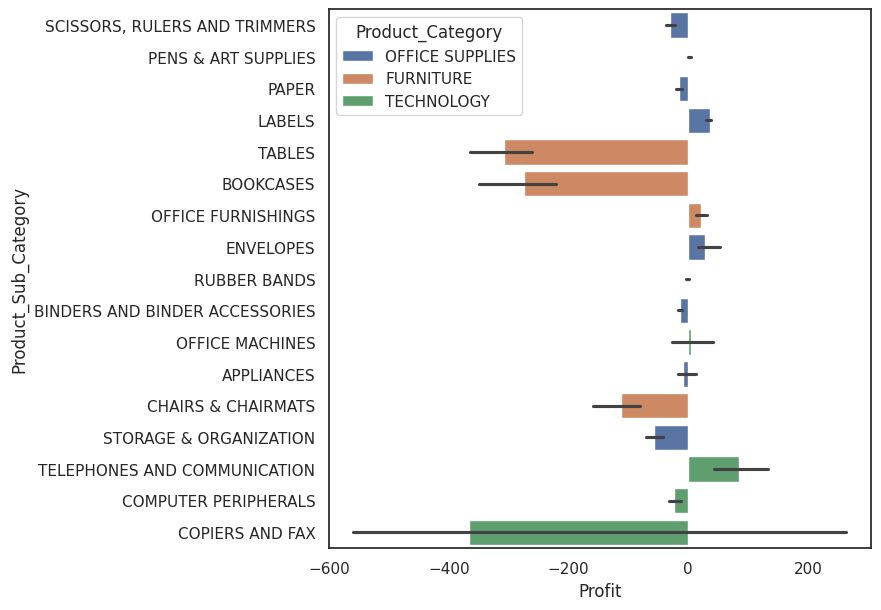

In [13]:
# plotting categorical variable across the y-axis
plt.figure(figsize = (7, 7))
sns.barplot(x = 'Profit', y = "Product_Sub_Category", hue = "Product_Category", data = df, estimator = np.median)
plt.show()

You can also plot the **count of the observations** across categorical variables using ```sns.countplot()```.

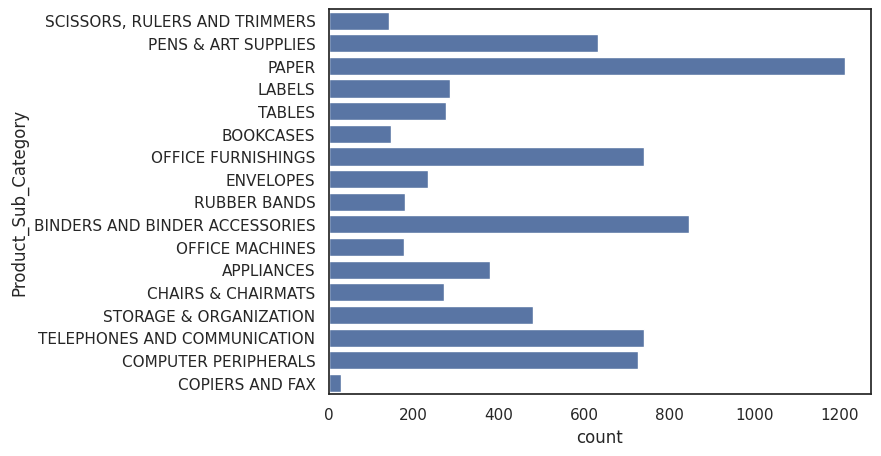

In [14]:
# Plotting count across a categorical variable 
plt.figure(figsize=(7, 5))
sns.countplot(y="Product_Sub_Category", data=df)
plt.show()

### Visualisig Time Series Data
- Plot simple time series plots
- Derive variables such as month and year and use them for richer visualisation

In [15]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style = "white")

# read the data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")

### Visualising Simple Time Series Data
Let's say you want to visualise numeric variables such as sales, Profit, and shipping_cost etc. over time.

In [16]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


Since Order_Date variable is in the orders dataframe, let's merge it.

In [17]:
# maerging with the orders data to get the Date Column
df = pd.merge(market_df, orders_df, how = 'inner', on = 'Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,54019,01-07-2009,LOW


In [18]:
# Now we have the Order_Date in the df
# It is Stored as a string (object) currently 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
 10  Order_ID             8399 non-null   int64  
 11  Order_Date           8399 non-null   object 
 12  Order_Priority       8399 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 853.2+ KB


Since Order_Date is string, we need to convert it into a datetime object. You can do that using pd.to_datetime() function.

In [19]:
# Convert Order_Date to datetime type
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Order_Date is now datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ord_id               8399 non-null   object        
 1   Prod_id              8399 non-null   object        
 2   Ship_id              8399 non-null   object        
 3   Cust_id              8399 non-null   object        
 4   Sales                8399 non-null   float64       
 5   Discount             8399 non-null   float64       
 6   Order_Quantity       8399 non-null   int64         
 7   Profit               8399 non-null   float64       
 8   Shipping_Cost        8399 non-null   float64       
 9   Product_Base_Margin  8336 non-null   float64       
 10  Order_ID             8399 non-null   int64         
 11  Order_Date           8399 non-null   datetime64[ns]
 12  Order_Priority       8399 non-null   object        
dtypes: datetime64[ns](1), float64(5),

/tmp/ipykernel_8759/220854924.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


Now, since on each day, multiple orders can be placed, we need to aggregate sales using a metric such as mean, median etc., and then create a time series plot.

In [20]:
# aggregating total sales by each day
time_df = df.groupby('Order_Date')['Sales'].sum()
print(time_df.head())
print(type(time_df))

Order_Date
2009-01-01     1052.8400
2009-01-02    11101.8700
2009-01-03    31997.8555
2009-01-04     1254.2500
2009-01-05    39734.4040
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


We can now create a time-series plot using sns.tsplot() function. 

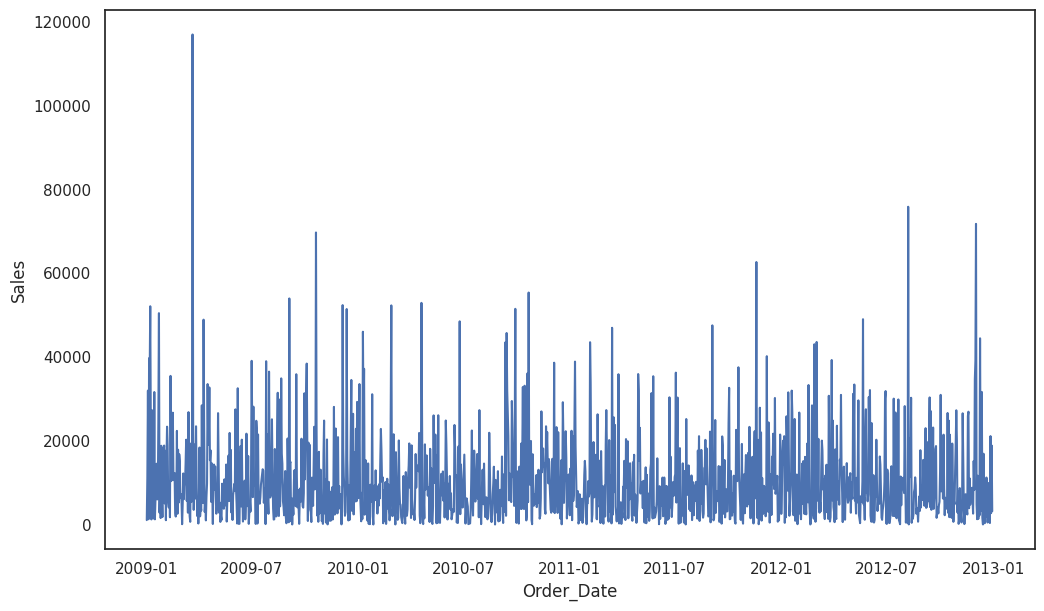

In [21]:
# time series plot

# figure size
plt.figure(figsize =(12, 7))

# tsplot
sns.lineplot(data=time_df)
plt.show()

#### Using Derived Data Metrics for Visualisation
It is often useful to use derived variables from date such as month and year and using them to indentify hidden patterns.

In [22]:
# extracting month and year from date

# extracting month
df['month'] = df['Order_Date'].dt.month

# extracting year
df['year'] = df['Order_Date'].dt.year

df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7,2009
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-11-09,MEDIUM,11,2010
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,54019,2009-07-01,LOW,7,2009


Now you can plot the average sales across years and months.

In [23]:
# grouping by year and month
df_time = df.groupby(["year", "month"]).Sales.mean()
df_time.head()

year  month
2009  1        2315.259908
      2        2187.372609
      3        2225.020157
      4        2286.491174
      5        1264.535923
Name: Sales, dtype: float64

There are another way to visualise numeric variables, such as Sales, across the year and month. We can pivot the month column to create a wide - formate dataframe, and then plot a heatmap.

In [24]:
# Pivoting the data using 'month'
year_month = pd.pivot_table(df, values = 'Sales', index = 'year', columns = 'month', aggfunc = 'mean')
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,2315.259908,2187.372609,2225.020157,2286.491174,1264.535923,1606.439439,2002.652474,1708.573653,1777.553631,2165.001596,1472.978852,2403.522257
2010,2027.269160,1525.733191,1369.861676,1791.735497,1424.795402,1734.205118,1352.267638,1148.823254,2167.581754,1863.530536,1651.536054,1786.863854
2011,1632.904078,1764.059653,1897.665840,1705.404716,1427.328783,1205.736863,1683.656061,1830.523197,1704.011086,1819.407446,2189.104143,1768.157605
2012,1968.939347,1816.661178,1767.554949,1472.664670,1805.577754,1819.611418,1445.295830,1672.624992,1615.591708,1765.058957,1939.546242,2273.777808


You can now create a heatmap using sns.heatmap().

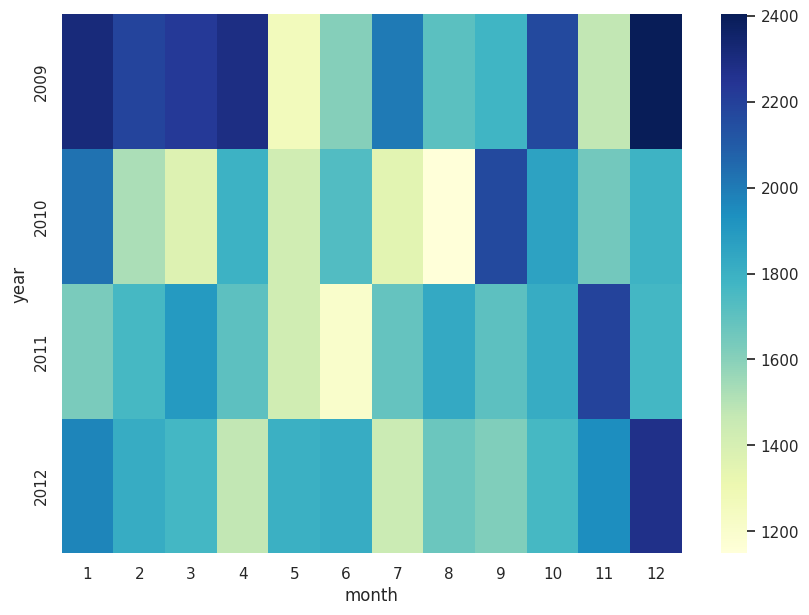

In [25]:
# figure size 
plt.figure(figsize=(10, 7))

# heatmap with a color map of choice
sns.heatmap(year_month, cmap = "YlGnBu")
plt.show()